In [6]:
import os
import re
import warnings
from copy import deepcopy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plt.style.use('toutl.mplstyle')
#from style import *


In [7]:
df = pd.read_csv('examen3.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   client_stayed             10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [8]:
display(df)

,clientnum,client_stayed,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
0,768805383,1,45,M,3,High School,Married,5833.333333333333,Blue,39,5,1,3,12691.0,777,1144,42
1,818770008,1,49,F,5,Graduate,Single,1666.6666666666667,Blue,44,6,1,2,8256.0,864,1291,33
2,713982108,1,51,M,3,Graduate,Married,8333.333333333334,Blue,36,4,1,0,3418.0,0,1887,20
3,769911858,1,40,F,4,High School,Unknown,1666.6666666666667,Blue,34,3,4,1,3313.0,2517,1171,20
4,709106358,1,40,M,3,Uneducated,Married,5833.333333333333,Blue,21,5,1,0,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,4166.666666666667,Blue,40,3,2,3,4003.0,1851,15476,117
10123,710638233,0,41,M,2,Unknown,Divorced,4166.666666666667,Blue,25,4,2,3,4277.0,2186,8764,69
10124,716506083,0,44,F,1,High School,Married,1666.6666666666667,Blue,36,5,3,4,5409.0,0,10291,60
10125,717406983,0,30,M,2,Graduate,Unknown,4166.666666666667,Blue,36,4,3,3,5281.0,0,8395,62


In [31]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Unique values in {col}:")
        print(df[col].unique())
    else:
        continue
df['dependent_count'].unique()

Unique values in gender:
['M' 'F']
Unique values in education_level:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Unique values in marital_status:
['Married' 'Single' 'Unknown' 'Divorced']
Unique values in income_category:
['5833.333333333333' '1666.6666666666667' '8333.333333333334'
 '4166.666666666667' '10000.0' 'Unknown']
Unique values in card_category:
['Blue' 'Gold' 'Silver' 'Platinum']


array([3, 5, 4, 2, 0, 1], dtype=int64)

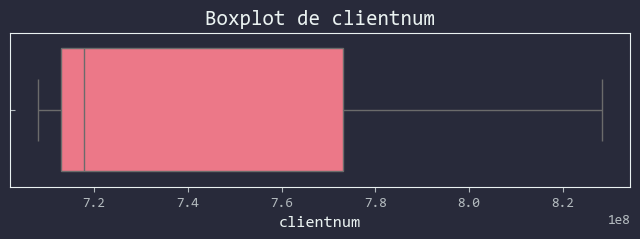

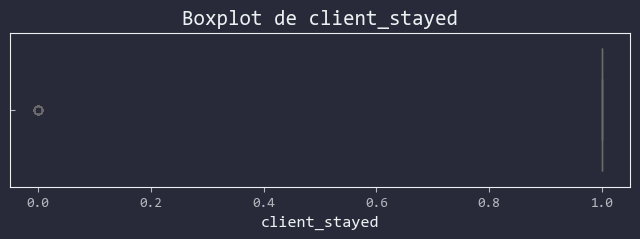

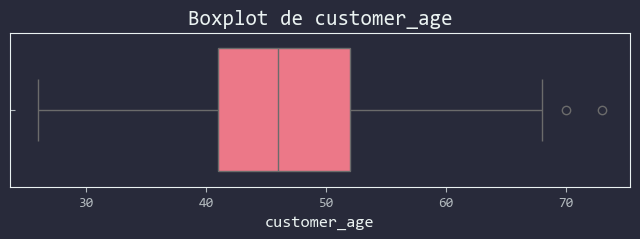

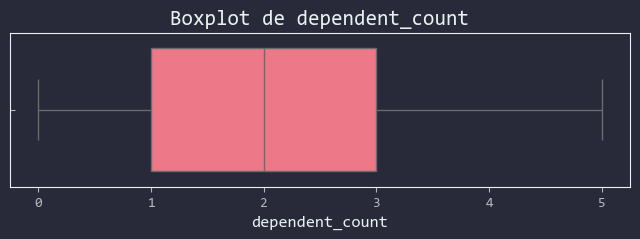

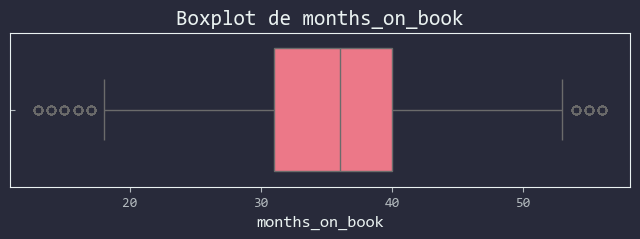

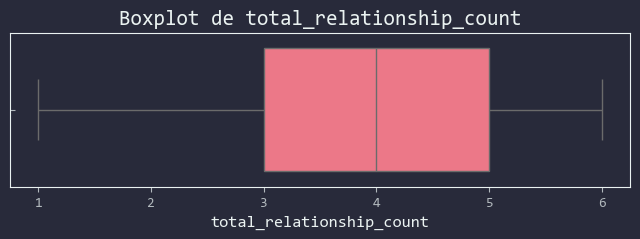

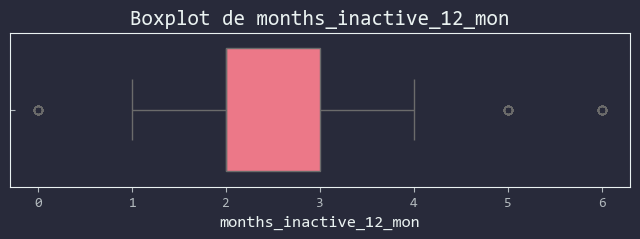

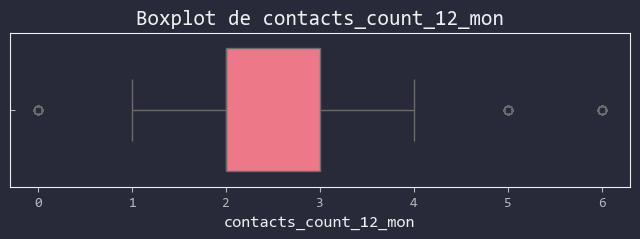

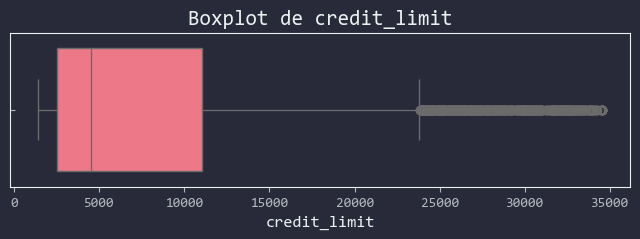

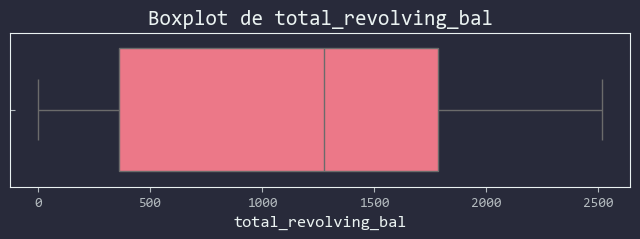

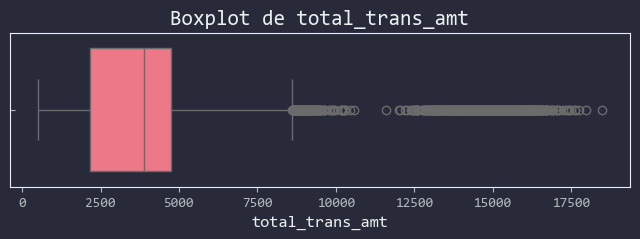

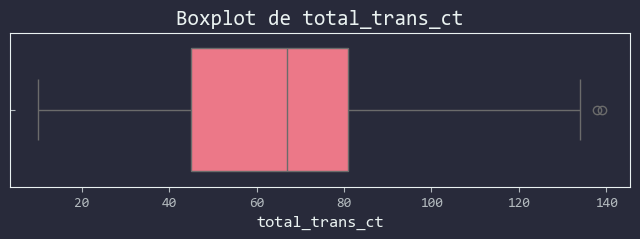

In [10]:
for col in df.columns:
    if df[col].dtype == 'int64' or df[col].dtype == 'float64':
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot de {col}')
        plt.xlabel(f'{col}')
        plt.show()
    else:
        continue


### 1. Análisis descriptivo
- Observar la distribución de cada una de las variables, con la variable de respuesta.
	- `groupby(client_stayed)` y luego las distribuciones.
- Ver la granularidad de cada variable.

- Matriz de correlación de los variables, para revisar qué tanto están relacionadas

In [28]:
print(df['client_stayed'].value_counts())
print(df['client_stayed'].value_counts(normalize=True) * 100)

client_stayed
1    8500
0    1627
Name: count, dtype: int64
client_stayed
1    83.934038
0    16.065962
Name: proportion, dtype: float64


In [34]:
resultado = df.drop(columns=['clientnum','customer_age','dependent_count']).groupby('client_stayed').sum(numeric_only=True)
resultado

,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,total_trans_amt,total_trans_ct
client_stayed,,,,,,,,
0,58862,5336,4382,4836,13237336.2,1094683,5035607,73107
1,304985,33274,19327,20029,74178458.9,10681135,39564575,583717


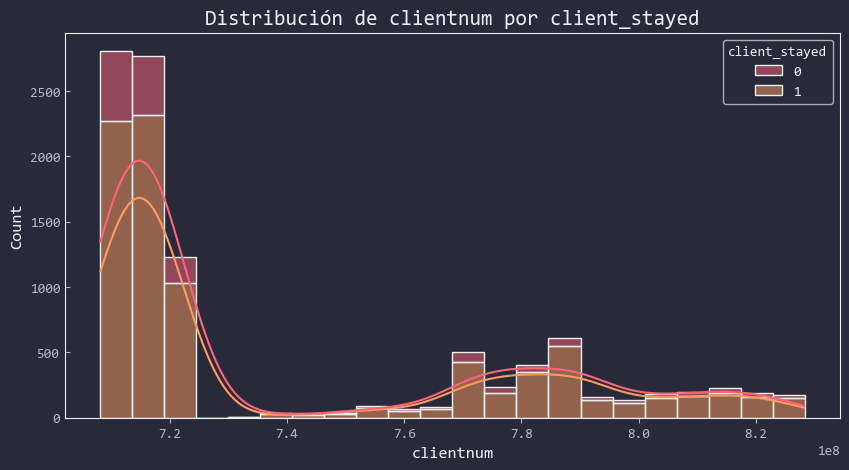

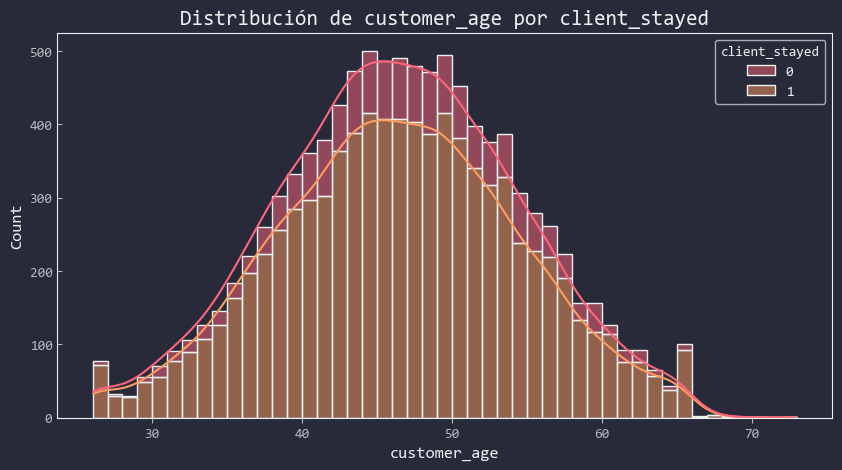

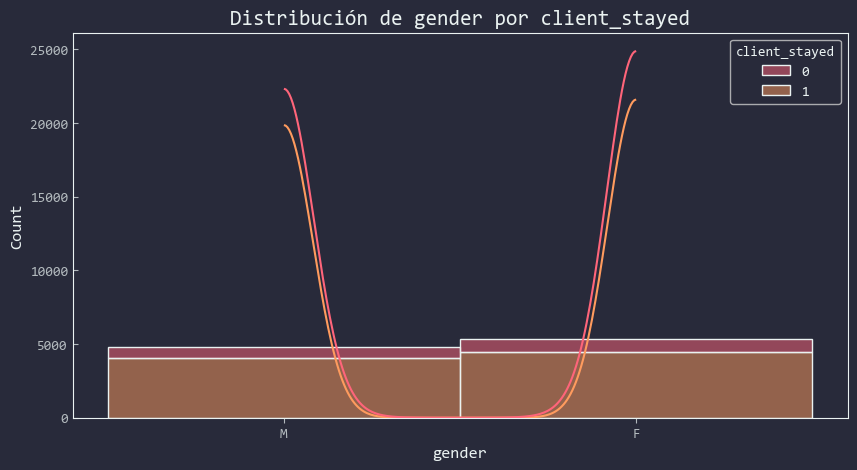

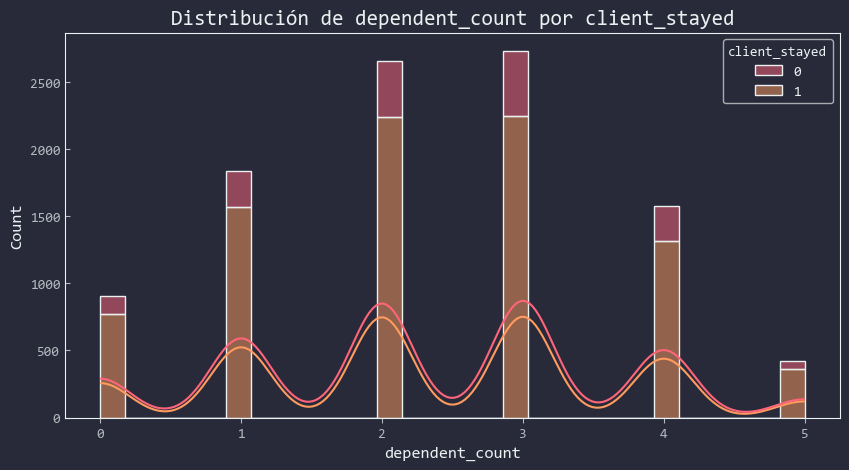

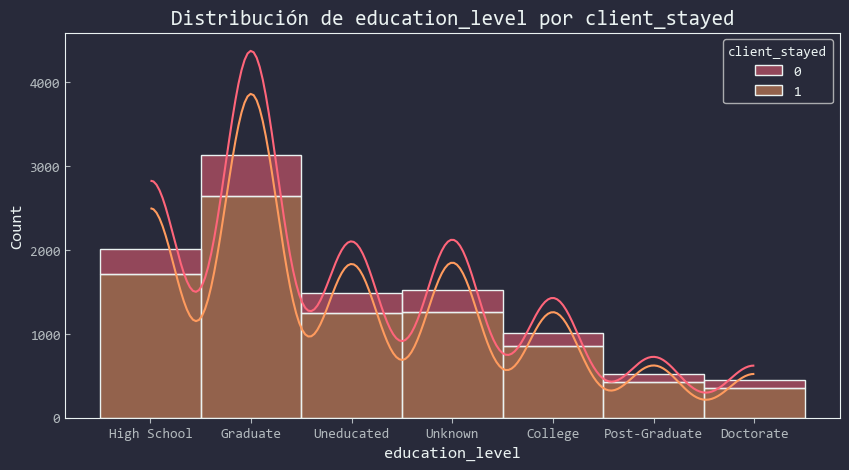

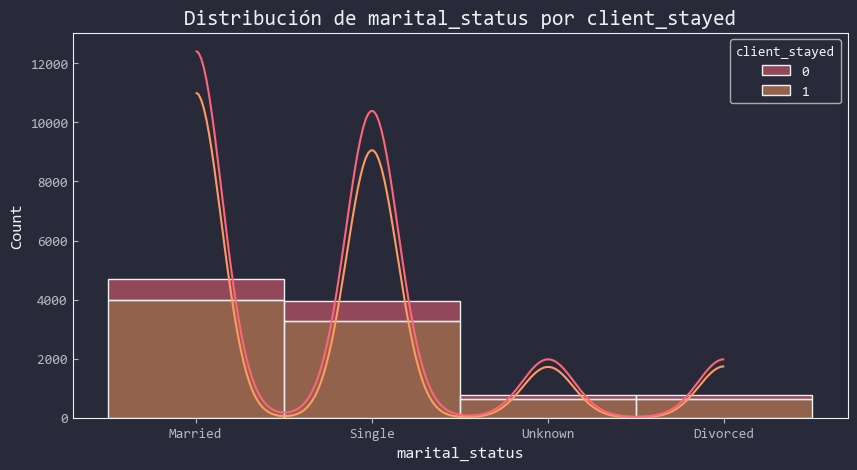

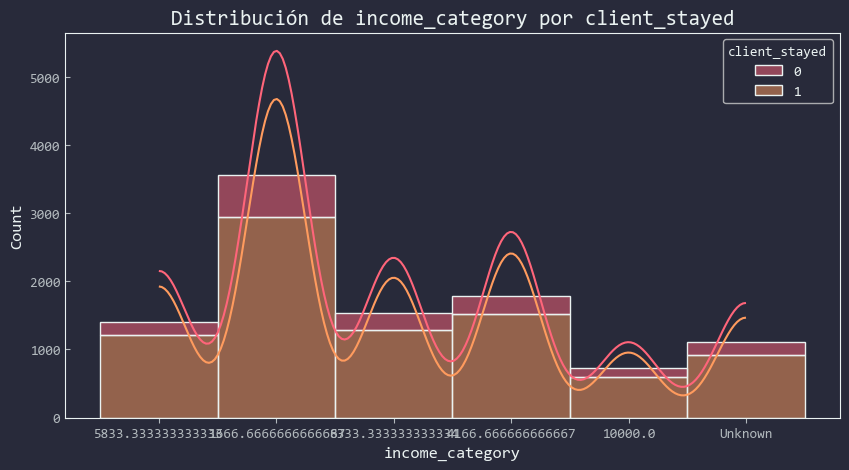

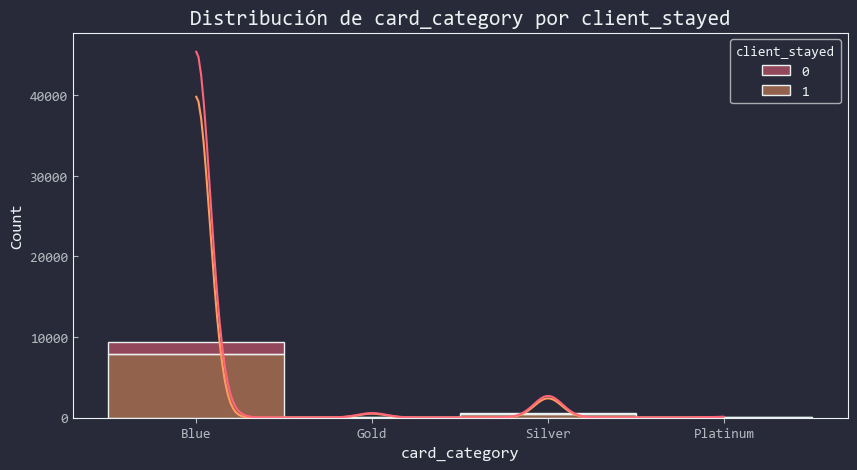

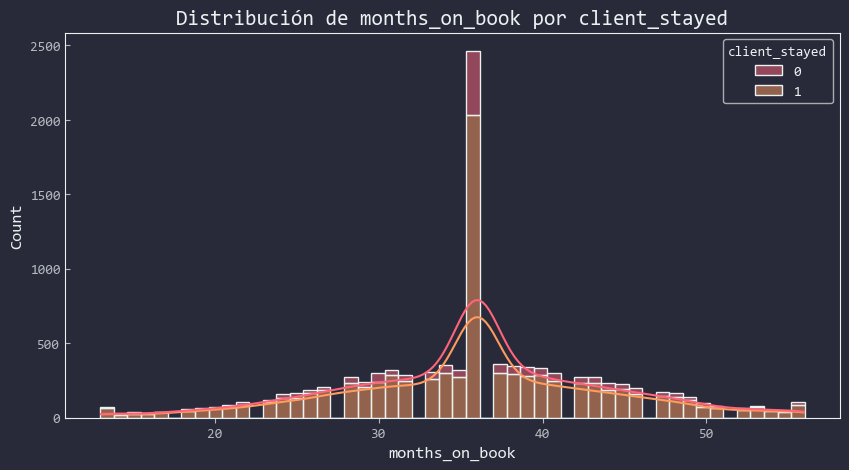

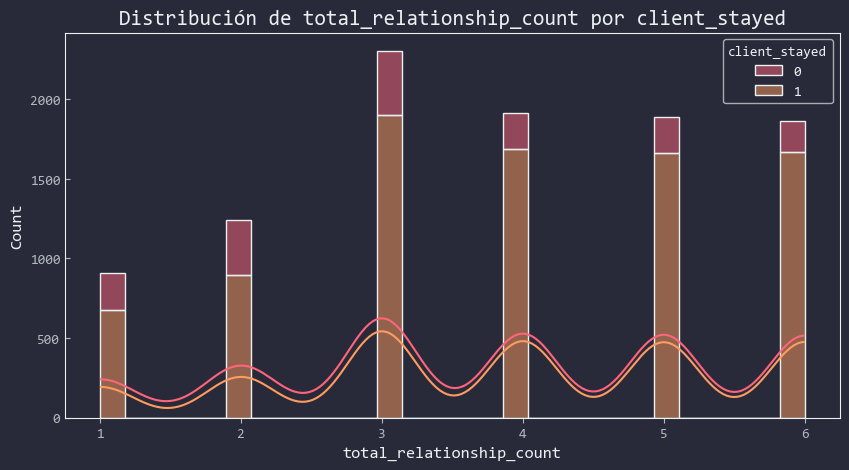

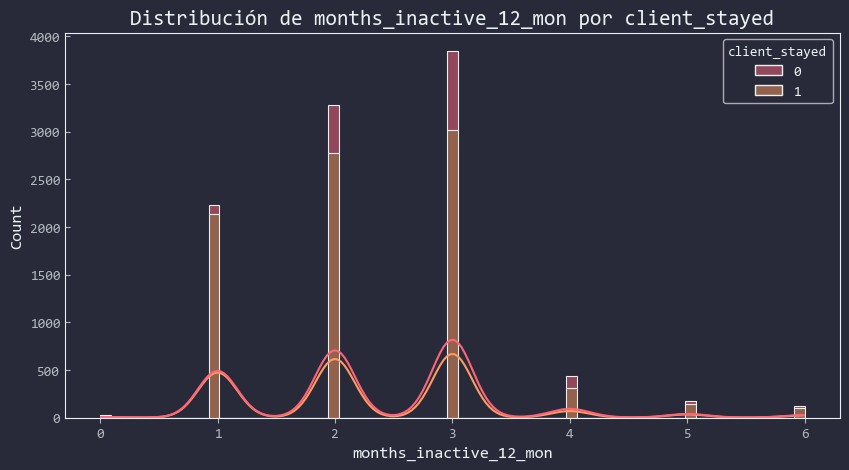

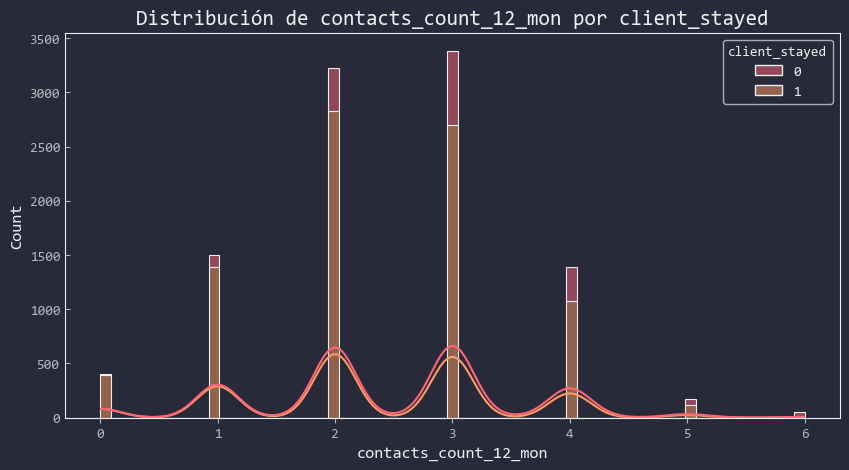

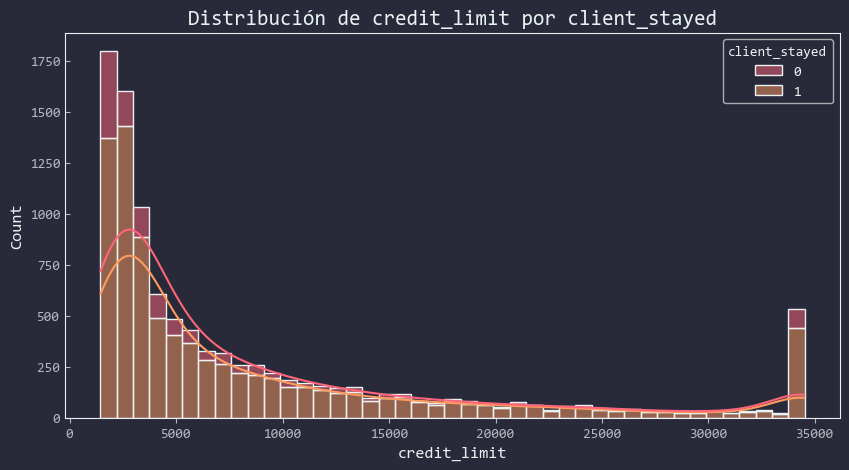

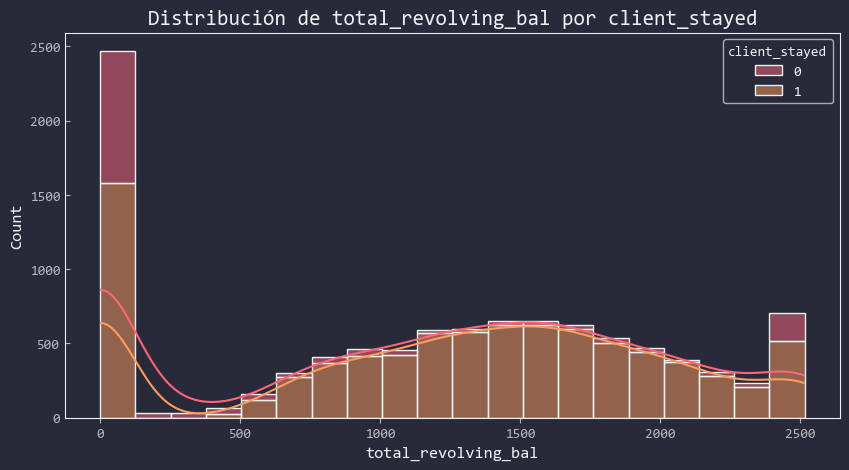

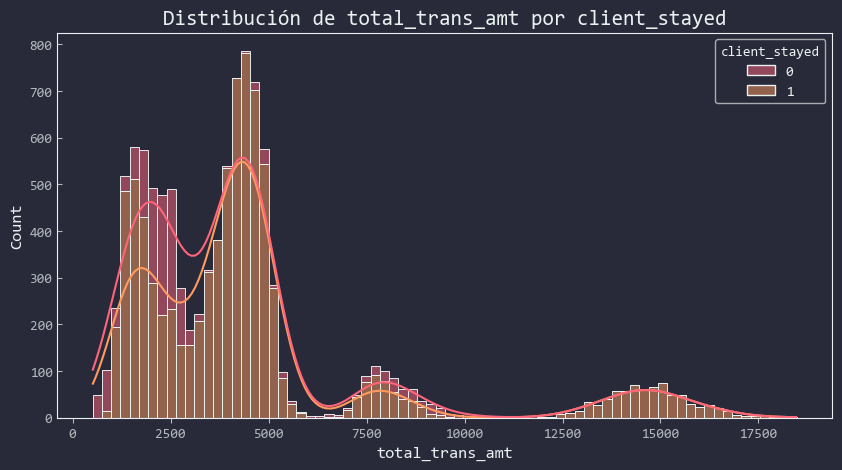

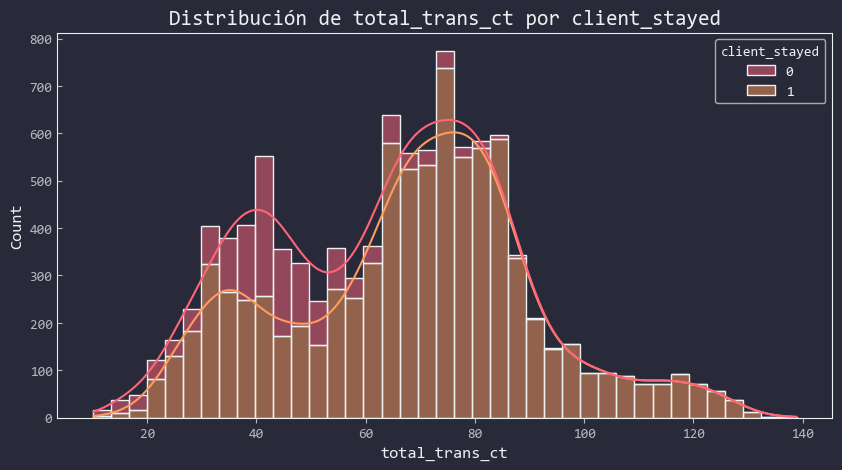

In [21]:
for column in df.columns:
    if column != 'client_stayed':
        plt.figure(figsize=(10, 5))
        sns.histplot(data=df, x=column, hue='client_stayed', multiple='stack', kde=True)
        plt.title(f'Distribución de {column} por client_stayed')
        plt.show()

In [39]:
frecuencia_valores = df['dependent_count'].value_counts().sort_index()
print("Frecuencia de cada valor:")
print(frecuencia_valores)

Frecuencia de cada valor:
dependent_count
0     904
1    1838
2    2655
3    2732
4    1574
5     424
Name: count, dtype: int64


In [23]:
granularidad = df.nunique()
granularidad

clientnum                   10127
client_stayed                   2
customer_age                   45
gender                          2
dependent_count                 6
education_level                 7
marital_status                  4
income_category                 6
card_category                   4
months_on_book                 44
total_relationship_count        6
months_inactive_12_mon          7
contacts_count_12_mon           7
credit_limit                 6205
total_revolving_bal          1974
total_trans_amt              5033
total_trans_ct                126
dtype: int64